In [418]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [421]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display_html
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, KFold,GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold, TunedThresholdClassifierCV, cross_validate
from sklearn.svm import SVC

In [424]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\
#from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor, Ridge, Lasso, ElasticNet, LinearRegression
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

### Область работы 2 (поиск  модели .... )

In [429]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [431]:
df = pd.read_csv(path_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [432]:
df = df.drop_duplicates()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


In [435]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [436]:
df[df['y'] == 58.900000]

,carat,cut,color,clarity,depth,table,price,x,y,z
16230,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [437]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

In [441]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.730864,3.536874
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.114259,0.694939
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,10.540000,8.060000


In [442]:
axis_features = ['x','y','z']
num_features = ['carat'] #,'depth','table']

y = np.array(df.price)
X = df.drop(columns=['price'])

X_train,X_test,y_train,y_test = train_test_split(X, y) 

In [447]:
def plot_2_error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black", alpha=0.25)
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red", alpha=0.25)
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

In [463]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('polynom', PolynomialFeatures(3,include_bias=False)),
    ('scaler', StandardScaler())])

In [450]:
num = Pipeline(steps=[
    ('missing_num', KNNImputer()),
    ('bin', KBinsDiscretizer(n_bins = 3, strategy = 'uniform', encode = 'onehot-dense')),
    ('scaler', StandardScaler())])

In [453]:
clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 
               'SI1':2, 'SI2':1, 'I1':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    


In [454]:
color_map = [
  {'col': 'color',
   'mapping': {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}}
]
color_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])    


In [455]:
cut_map = [
  {'col': 'cut',
   'mapping': {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}}
]
cut_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])   

In [465]:
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),# убрать быстую разряженную 
        ("ordinal_map", clarity_transformer, ['clarity']),
        ("color_map", color_transformer, ['color']),
        ("cut_map", cut_transformer, ['cut'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('missing_num', KNNImputer()),
                                                 ('bin',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                   n_bins=3,
                                                                   strateg...
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': D    6
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['color']),
                                ('cut_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cut'])])

,8196,20345,12778,39944,31493
axis_transformer__x,1.791708,-0.535080,0.124623,1.319219,-1.159122
axis_transformer__y,1.847716,-0.603553,0.078851,1.407744,-1.151272
axis_transformer__z,1.833376,-0.532016,-0.056053,1.458375,-1.209903
axis_transformer__x^2,1.922333,-0.579114,0.027059,1.332282,-1.077457
axis_transformer__x y,1.959403,-0.608471,0.005184,1.386431,-1.075451
axis_transformer__x z,1.956411,-0.578741,-0.060897,1.421518,-1.098787
axis_transformer__y^2,1.995050,-0.637455,-0.016949,1.440183,-1.072780
axis_transformer__y z,1.993821,-0.608231,-0.082495,1.477180,-1.096982
axis_transformer__z^2,1.975453,-0.576221,-0.147062,1.500963,-1.114137
axis_transformer__x^3,2.026861,-0.602813,-0.064713,1.315760,-0.987388


In [ ]:
# model_1 = Pipeline(steps=[
#     ('preproc', CT),
#     ('estimator', Lasso())
#     ])
# cv = RepeatedKFold(n_splits=5, n_repeats = 5)

# alphas = np.logspace(0, 2, 200)
# param_grid = [
#   {'estimator__alpha': alphas}
# ]

# grid = GridSearchCV(model_1, param_grid, cv = cv, return_train_score = True, scoring = 'neg_mean_squared_error', n_jobs = -1)
# grid.fit(X_train, y_train)
# grid

In [ ]:
grid.best_params_

In [472]:
model_Lasso = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Lasso(alpha = 1.246))
    ])
model_Lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.627e+09, tolerance: 4.880e+07
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   IterativeImputer(max_iter=20,
                                                                                    missing_values=0)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer()),
                                                                  ('bin',
                                                                   KBinsDiscretizer(encode='one...
                                                                                            'mapping': D    6
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['color']),
                                                 ('cut_map',
                                                  Pipeline(steps=[('missing_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cut'])])),
                ('estimator', Lasso(alpha=1.246))])

In [474]:
model_Lasso.score(X_test, y_test)

0.9158614740215294

Max Error: -3,338
 
----------------------
   MAPE Error: 40.52
----------------------


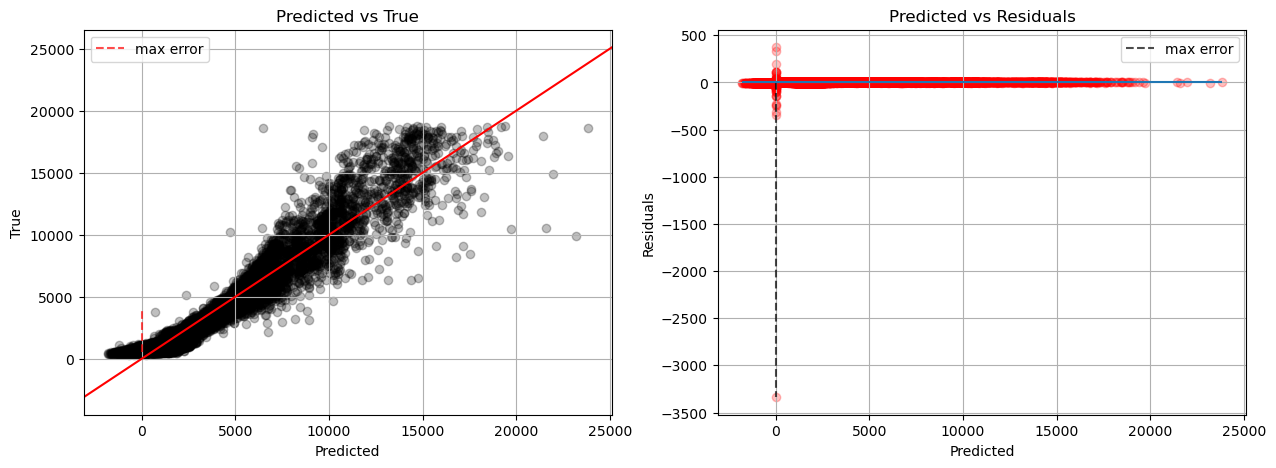

In [480]:
plot_2_error(y_test, model_Lasso.predict(X_test))

In [482]:
print(irq_mse(y_test, model_Lasso.predict(X_test)))
print(mean_squared_error(y_test, model_Lasso.predict(X_test)))

-13418097.979432039
1311450.1848111819


In [486]:
model_target_1 =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Lasso(alpha = 1.246))
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_1.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        IterativeImputer(max_iter=20,
                                                                                                                         missing_values=0)),
                                                                                                       ('polynom',
                                                                                                        PolynomialFeatures(degree=3,
                                                                                                                           include_bias=False)),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['x',
                                                                                        'y',
                                                                                        'z']),
                                                                                      ('num',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        KNNImputer()...
                                                                                       ['color']),
                                                                                      ('cut_map',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ce',
                                                                                                        OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        MinMaxScaler())]),
                                                                                       ['cut'])])),
                                                     ('estimator',
                                                      Lasso(alpha=1.246))]),
                           transformer=QuantileTransformer(output_distribution='normal'))

Max Error: 7
 
----------------------
   MAPE Error: 110.19
----------------------


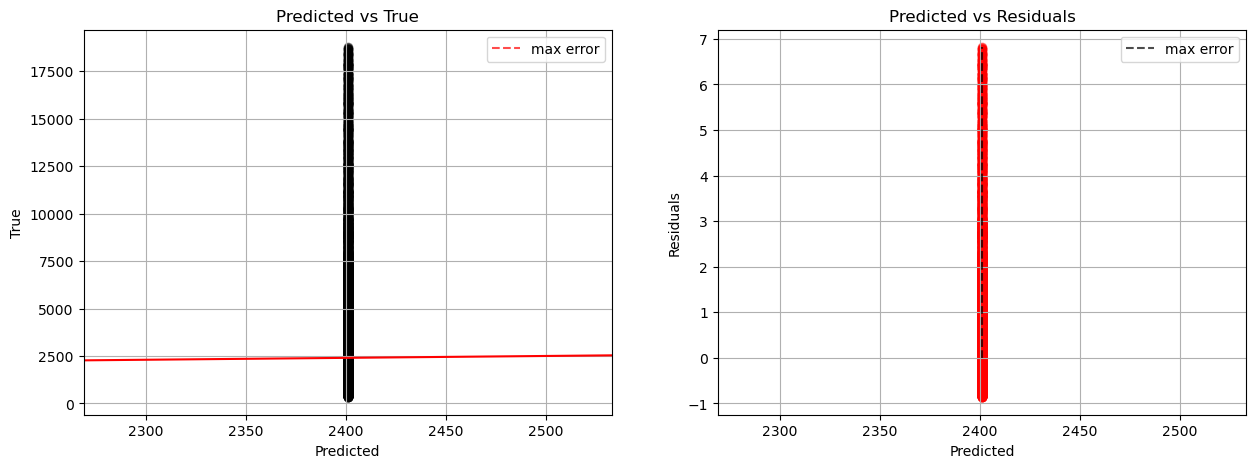

-158347811.0841452
17865620.54625122


In [488]:
plot_2_error(y_test, model_target_1.predict(X_test))
print(irq_mse(y_test, model_target_1.predict(X_test)))
print(mean_squared_error(y_test, model_target_1.predict(X_test)))

In [490]:
model_2 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge())
    ])
cv = RepeatedKFold(n_splits=5, n_repeats = 5)

alphas = np.logspace(0, 100, 200)
param_grid = [
  {'estimator__alpha': alphas}
]

grid = GridSearchCV(model_2, param_grid = param_grid, cv = cv, return_train_score = True, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('axis_transformer',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z']),
                                                                        ('num...
       2.83309610e+090, 9.01101825e+090, 2.86606762e+091, 9.11588830e+091,
       2.89942285e+092, 9.22197882e+092, 2.93316628e+093, 9.32930403e+093,
       2.96730241e+094, 9.43787828e+094, 3.00183581e+095, 9.54771611e+095,
       3.03677112e+096, 9.65883224e+096, 3.07211300e+097, 9.77124154e+097,
       3.10786619e+098, 9.88495905e+098, 3.14403547e+099, 1.00000000e+100])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [491]:
grid.best_params_

{'estimator__alpha': 1.0}

In [492]:
model_Ridge= Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge(alpha = 1))
    ])
model_Ridge.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   IterativeImputer(max_iter=20,
                                                                                    missing_values=0)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer()),
                                                                  ('bin',
                                                                   KBinsDiscretizer(encode='one...
                                                                                            'mapping': D    6
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['color']),
                                                 ('cut_map',
                                                  Pipeline(steps=[('missing_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cut'])])),
                ('estimator', Ridge(alpha=1))])

Max Error: -27,128
 
----------------------
   MAPE Error: 40.78
----------------------


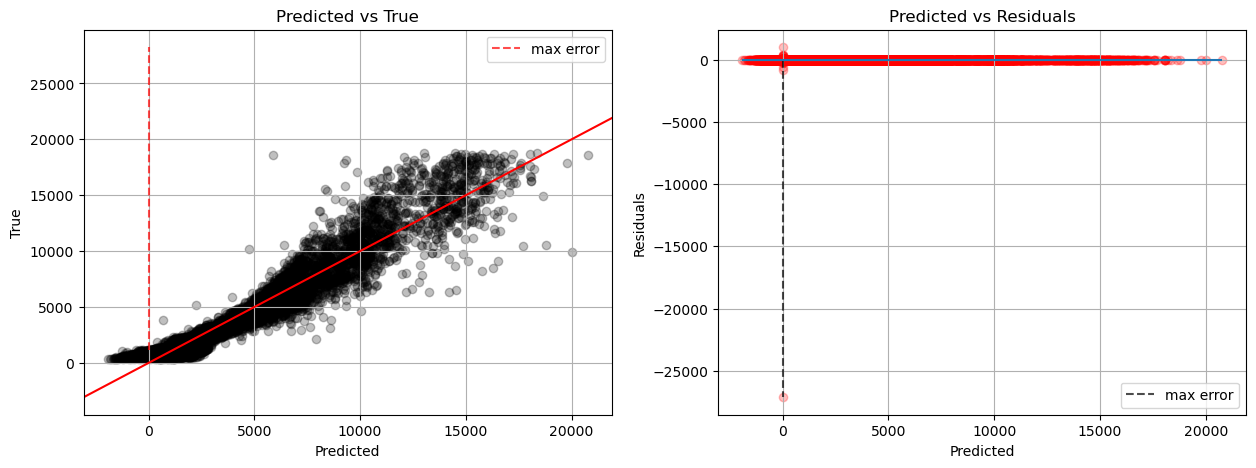

-12550628.735602975
1252255.2472817865


In [493]:
plot_2_error(y_test, model_Ridge.predict(X_test))
print(irq_mse(y_test, model_Ridge.predict(X_test)))
print(mean_squared_error(y_test, model_Ridge.predict(X_test)))

In [500]:
model_target_2 =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(alpha = 1))
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_2.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        IterativeImputer(max_iter=20,
                                                                                                                         missing_values=0)),
                                                                                                       ('polynom',
                                                                                                        PolynomialFeatures(degree=3,
                                                                                                                           include_bias=False)),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['x',
                                                                                        'y',
                                                                                        'z']),
                                                                                      ('num',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        KNNImputer()...
                                                                                       ['color']),
                                                                                      ('cut_map',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ce',
                                                                                                        OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        MinMaxScaler())]),
                                                                                       ['cut'])])),
                                                     ('estimator',
                                                      Ridge(alpha=1))]),
                           transformer=QuantileTransformer(output_distribution='normal'))

Max Error: 2
 
----------------------
   MAPE Error: 12.81
----------------------


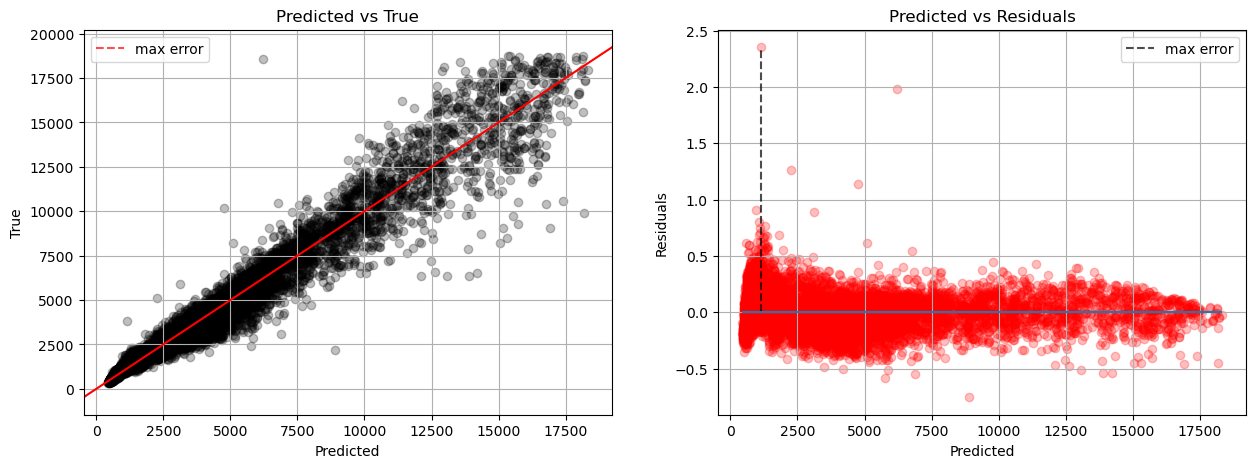

-3777045.23368215
680614.0946369885


In [501]:
plot_2_error(y_test, model_target_2.predict(X_test))
print(irq_mse(y_test, model_target_2.predict(X_test)))
print(mean_squared_error(y_test, model_target_2.predict(X_test)))

Max Error: 2
 
----------------------
   MAPE Error: 10.70
----------------------


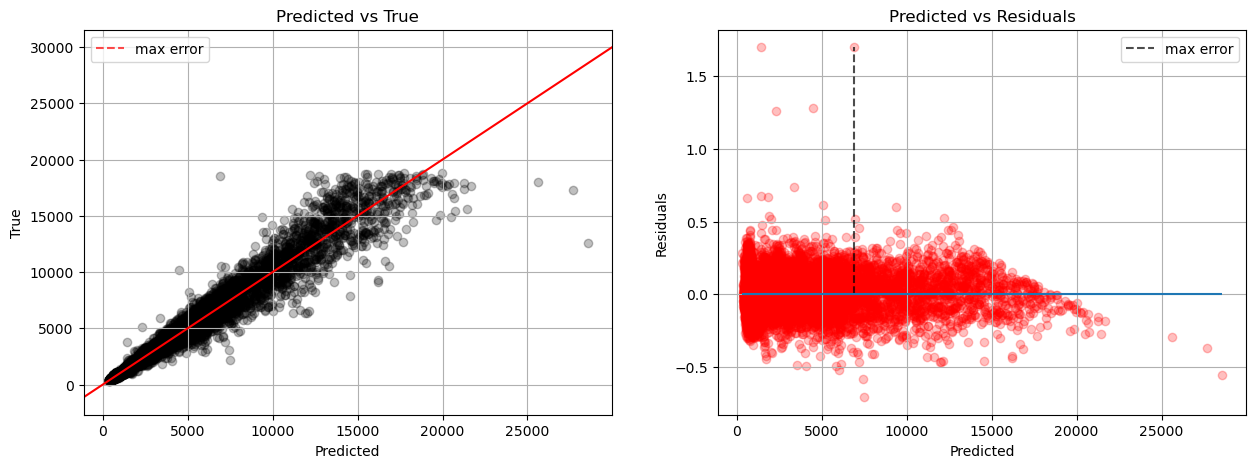

In [502]:
model_target_3 =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(alpha = 1))
                            ]),
                transformer=PowerTransformer()
)

model_target_3.fit(X_train, y_train)
plot_2_error(y_test, model_target_3.predict(X_test))

In [512]:
print(irq_mse(y_test, model_target_3.predict(X_test)))
print(mean_squared_error(y_test, model_target_3.predict(X_test)))

-3337188.2055257782
672960.4598611568
